## Context
When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men and women’s shoes, and to group products together to identify similarities and differences between the product range of these renowned brands.

## Objective
To perform and exploratory data analysis and cluster the products based on various factors


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?

## Data
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product


**Importing necessary libraries**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style='darkgrid')

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
#from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 



In [130]:
# Reading the dataset 
path = 'F:/GL Office/case study/Unsupervised Learning/Practice exercise 2/addidas data for HC clustering/'
data=pd.read_csv(path+'data_add_nik.csv')

In [131]:
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [132]:
# fixing column names
data.columns = [c.replace(' ','_') for c in data.columns]

In [133]:
# lets us look at the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
Product_Name     3268 non-null object
Product_ID       3268 non-null object
Listing_Price    3268 non-null int64
Sale_Price       3268 non-null int64
Discount         3268 non-null int64
Brand            3268 non-null object
Rating           3268 non-null float64
Reviews          3268 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [134]:
data.head()

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


**Let us create a copy of our data**

In [135]:
df = data.copy()

**We wont need Product_ID for analysis, so let us drop this column.**

In [136]:
df.drop('Product_ID',axis=1,inplace=True)

In [137]:
# lets check duplicate observations
df.duplicated().sum()

117

- There are 117 duplicate observations. We will remove them from the data.

In [138]:
df = df[(~df.duplicated())].copy()

**Lets take a look at summary of the data**

In [139]:
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,7045.960330,5983.166931,27.860997,3.285687,41.891146
std,4652.089511,4173.708897,22.442753,1.371611,31.283464
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.600000,40.000000
75%,8999.000000,7799.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**Observations**
- 0 in the listing price indicates missing values
- Average listing price is 6868 
- Average sale price is 6134
- Average discount is 26 percent
- Average rating is 3.2
- Average number of reviews is 42

In [140]:
# lets check how many products have listing price 0
(df.Listing_Price == 0).sum()

336

In [141]:
# lets check the products which have listing price 0
df[(df.Listing_Price == 0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [142]:
df[(df.Listing_Price == 0)].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,336.0,336.000000,336.0,336.000000,336.000000
mean,0.0,11203.050595,0.0,2.797619,8.261905
std,0.0,4623.825788,0.0,2.150445,19.708393
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.950000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


- There are 336 observations which has missing values in  listing price column


**We see that the discount for the products with listing price 0 is 0. So we will replace the listing price with corresponding sale price for those observations.**

In [143]:
df.loc[(df.Listing_Price == 0),['Listing_Price']] =  df.loc[(df.Listing_Price == 0),['Sale_Price']].values

In [144]:
df.Listing_Price.describe()

count     3151.000000
mean      8240.573151
std       4363.018245
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: Listing_Price, dtype: float64

In [145]:
# checking missing values
df.isna().sum()

Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

**Observations**
- The 0 or missing values in listing price has been imputed

### EDA

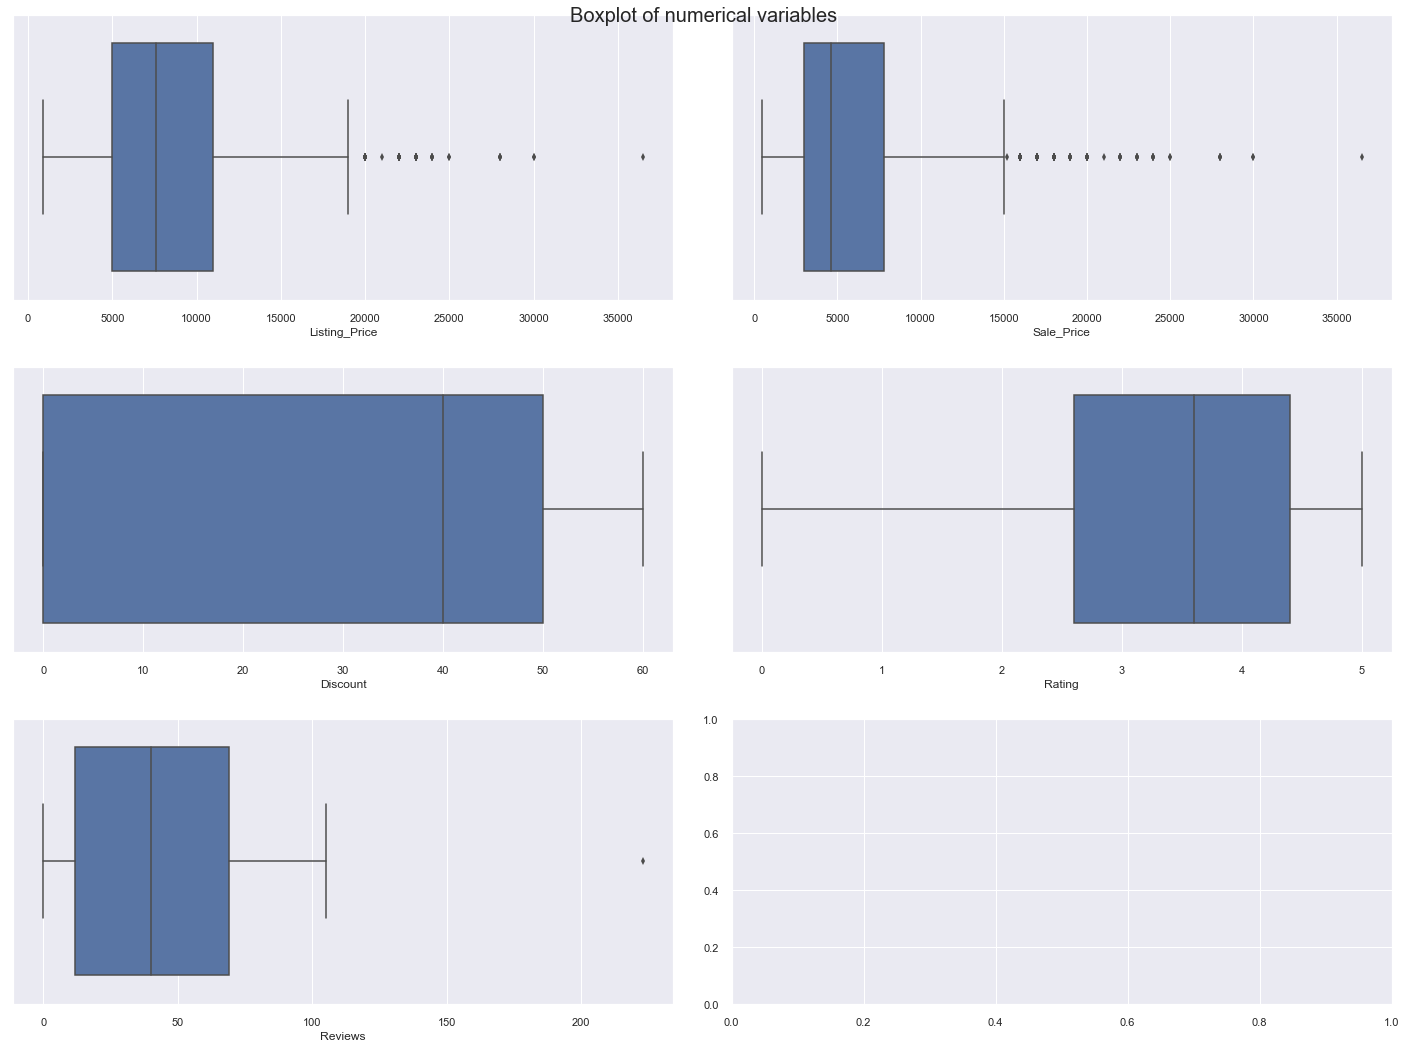

In [146]:
# selecting numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.boxplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- There are upper outliers in the listing price, which indicates very expensive products.
- There are upper outliers in the sale price too.
- Maximum discount given is 60%
- Majority of the ratings are between 2.5 and 4.5
- Number of reviews are between 1 and 100, with one outlier value above 200.

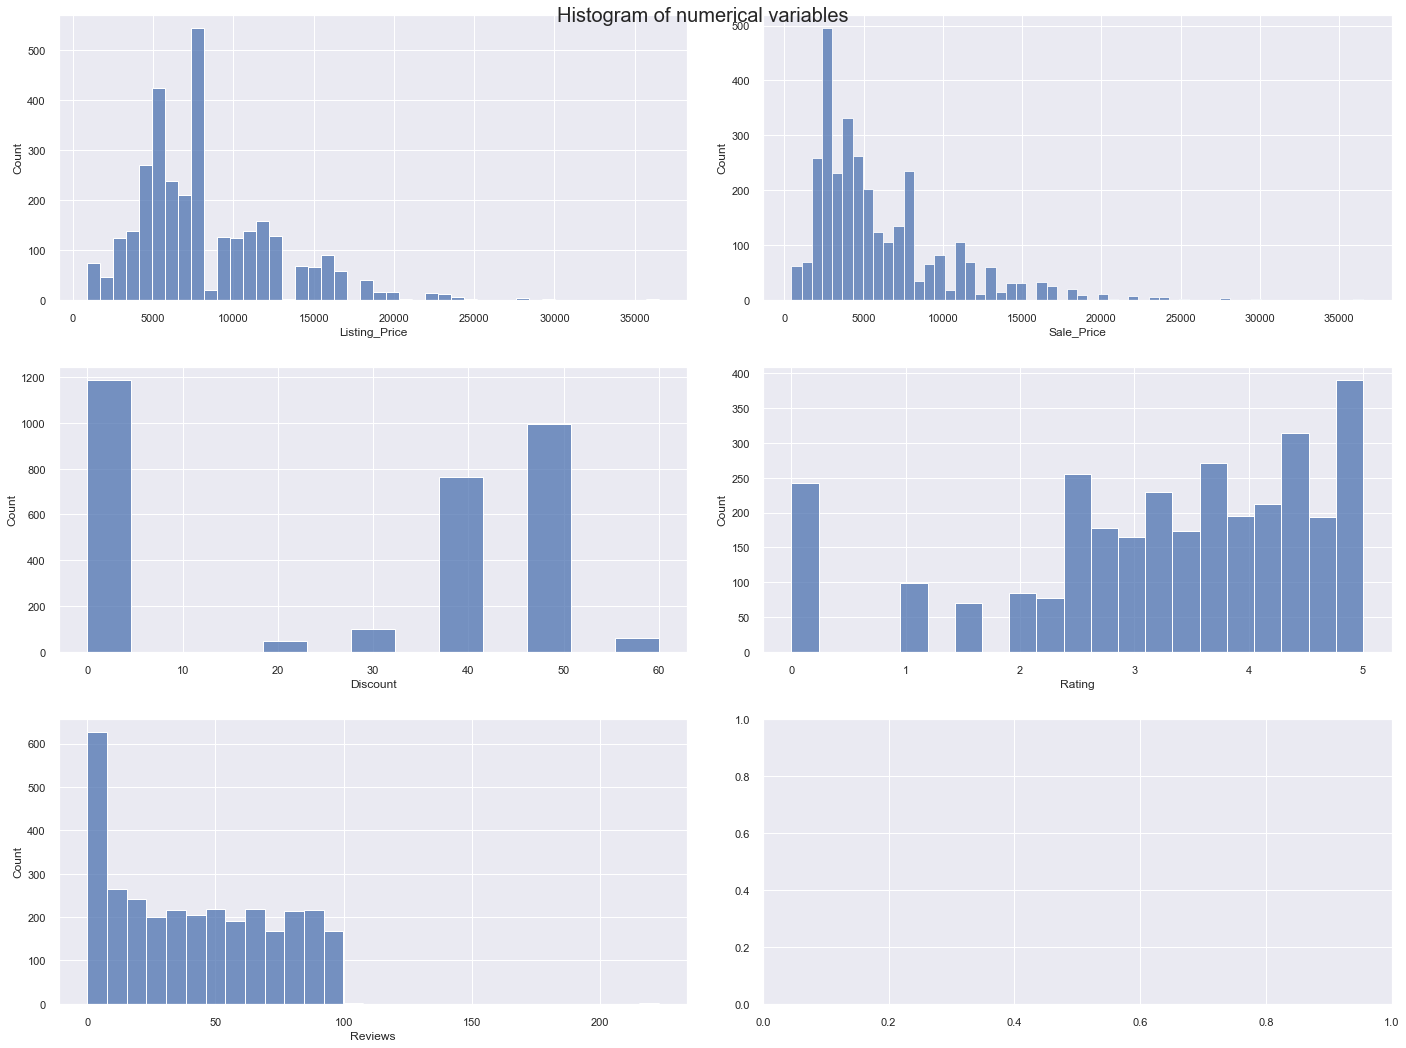

In [147]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**
- Listing price and sale price distribution is right skewed.
- Rating is left skewed.



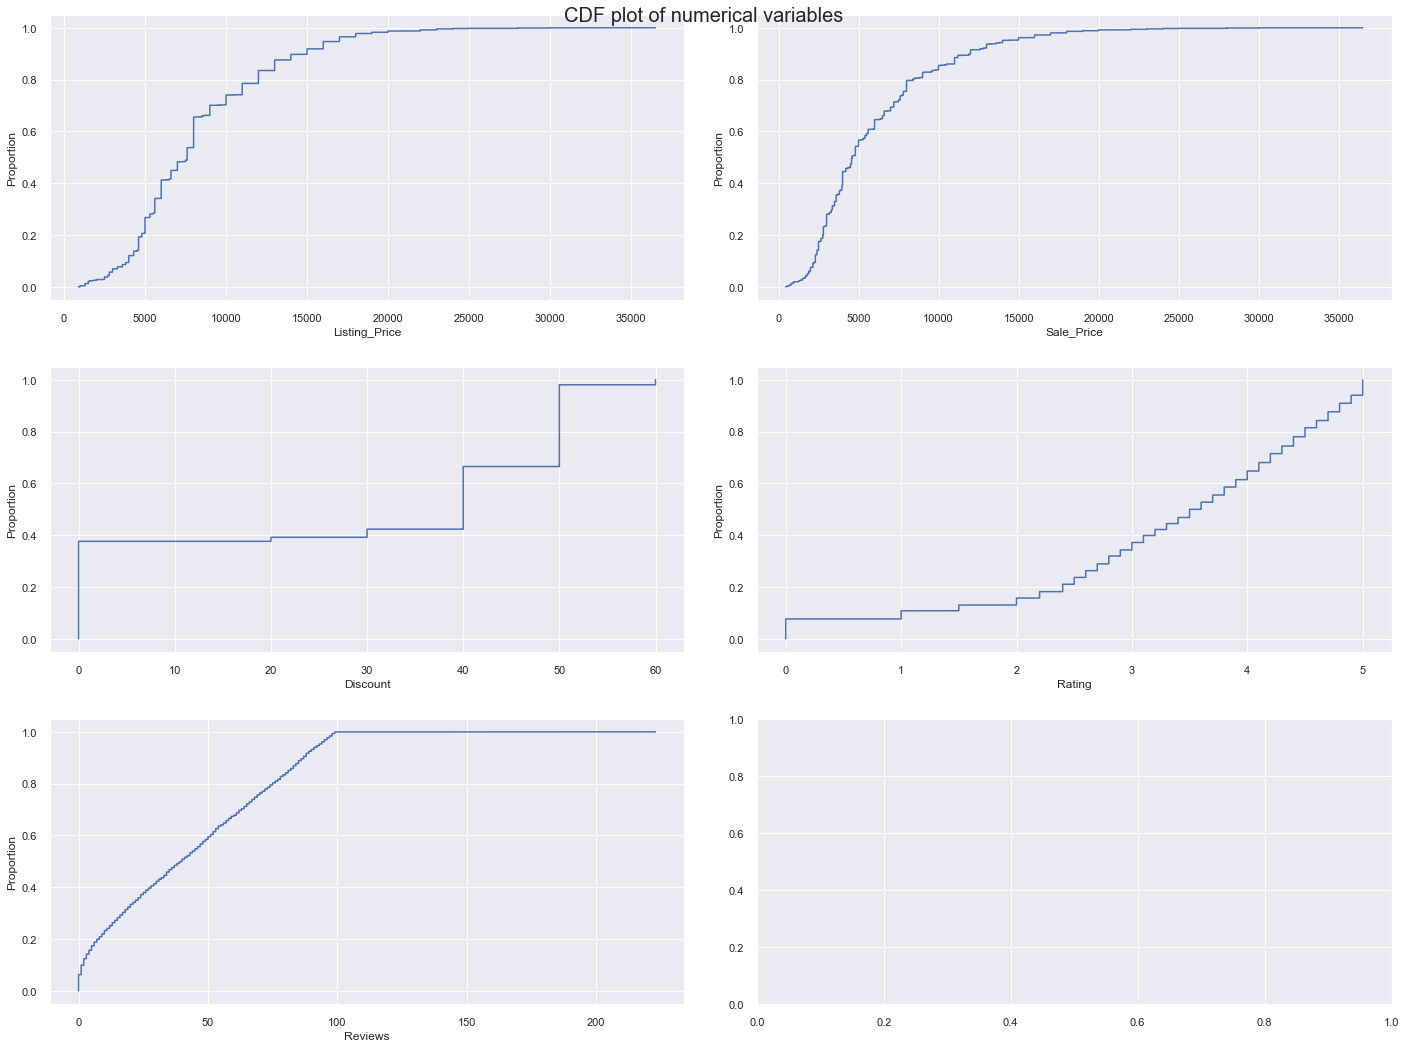

In [148]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

**Observations**
- 90 % of the products have listing price less than 15000.
- 95% of the product have sale price less than 15000.
- 80% of the products have at least 50% discount or less than 50 %. 
- 50 % off the products have rating 3.5 or less than 3.5
- Almost all products have 100 or less than 100 reviews.

## Bivariate Analysis

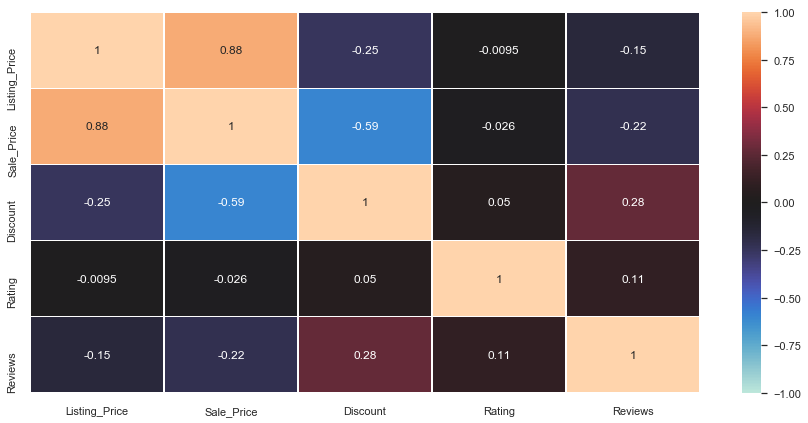

In [149]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

**Observations**
- sale price and listing price is highly positively correlated which is obvious
- Discount is somewhat negative correlated with listing price or sale price. which indicates that expensive products either have less discounts or no discounts

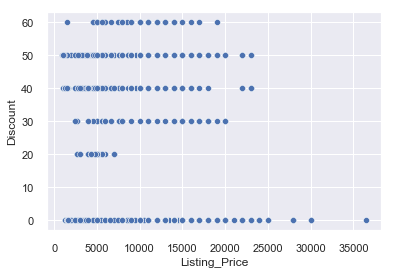

In [150]:
sns.scatterplot(x=df.Listing_Price,y=df.Discount)

**Observations**
- Majority 60% discounts and 50% discounts is given to any products whose listing price is 10,000 or less.

In [151]:
# variables used for clustering
all_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

In [152]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled = scaler.fit_transform(subset)   

In [153]:
# Creating a dataframe of the above results
subset_scaled_df = pd.DataFrame(subset_scaled,columns=subset.columns)

In [154]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            



Cophent correlation for distance metrics euclidean and linkahe method single is 0.6391818886918261
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.7162924652763346
Cophent correlation for distance metrics euclidean and linkahe method average is 0.7664519011885238
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.6047194146480928
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.5854266041780847
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.6326026537632393
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.717763178117288
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.5648124256800041
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.6325008742275655
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.565983014993

In [155]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.779045948953341, which is obtinaed with cityblock distance metric and average linkage method


### Lets explore 'centroid', 'median','ward' linkage method which requires only Euclidean distance metrics

In [156]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
    print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkahe method single is 0.6391818886918261
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.7162924652763346
Cophent correlation for distance metrics euclidean and linkahe method average is 0.7664519011885238
Cophent correlation for distance metrics euclidean and linkahe method median is 0.5943223817882168
Cophent correlation for distance metrics euclidean and linkahe method ward is 0.5416485654617125
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.6047194146480928
**************************************************************************************************************
Highest cophenet correlation is 0.7664519011885238, which is obtinaed with cityblock distance metric and average linkage method


**Observations**
- we see that cophenet index is maximum with cityblock distance metric which manhattan distance method and average linkage method. 
- Lets see the dendrogram of different linkage method

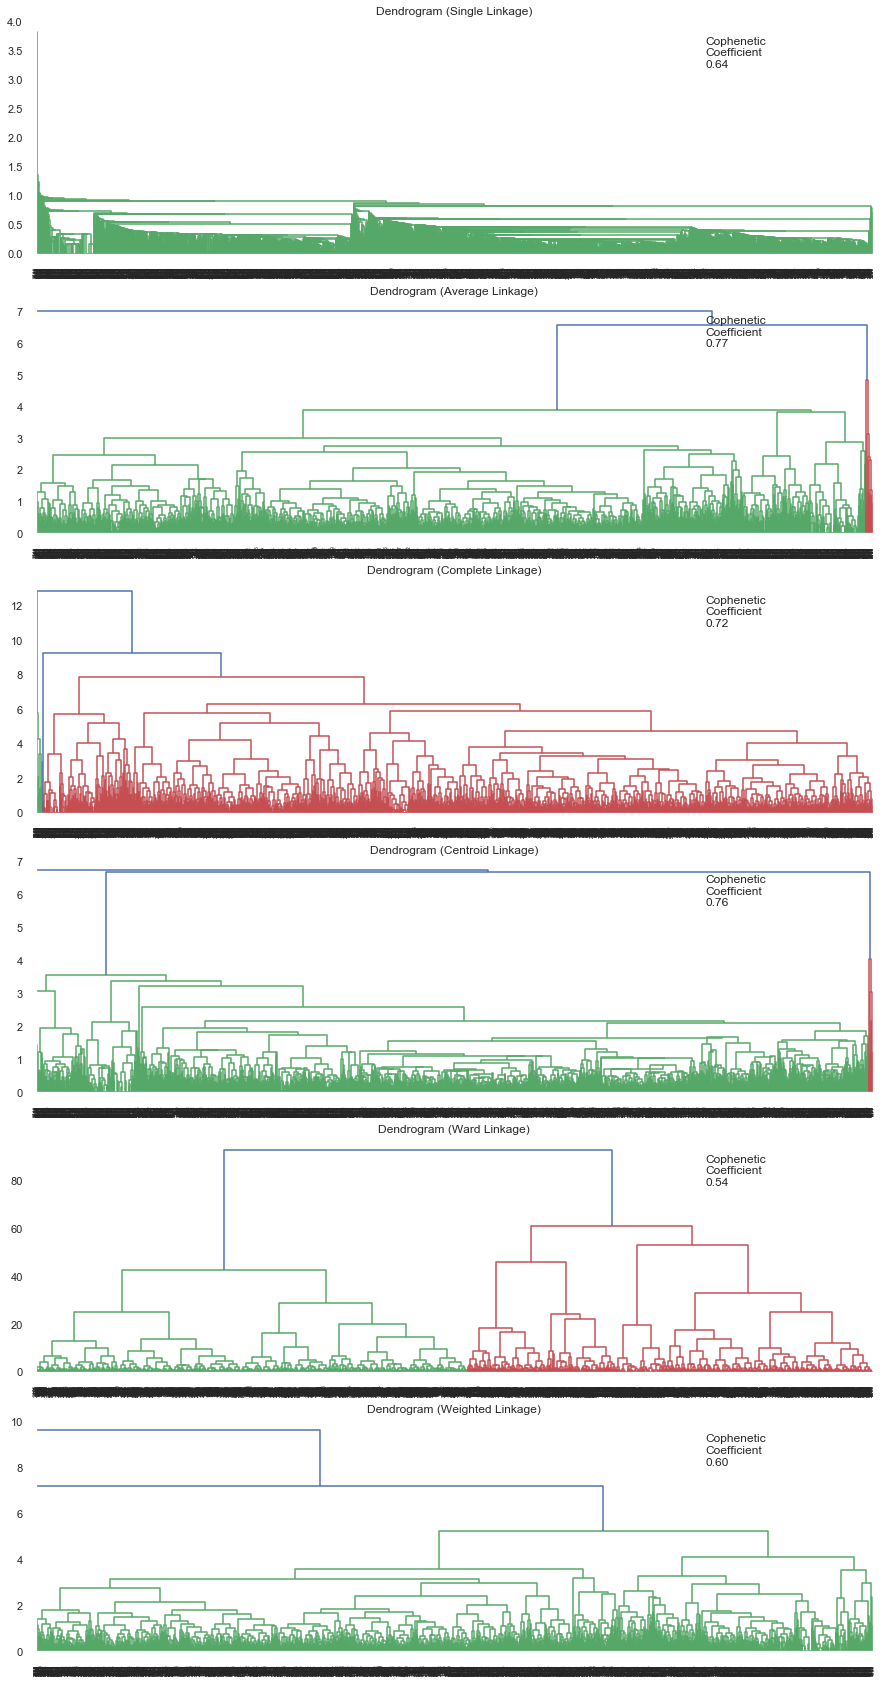

In [157]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

**Observations**
 - Dendrogram with ward linkage method shows distinct and separate cluster
 

In [158]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.639182
1,average,0.766452
2,complete,0.716292
3,centroid,0.756031
4,ward,0.541649
5,weighted,0.604719


- Let us see the dndrogram of 'mahalanobis','cityblock' with 'average', 'weighted' linkage method as they gave high cophenetic correlation value

In [159]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']

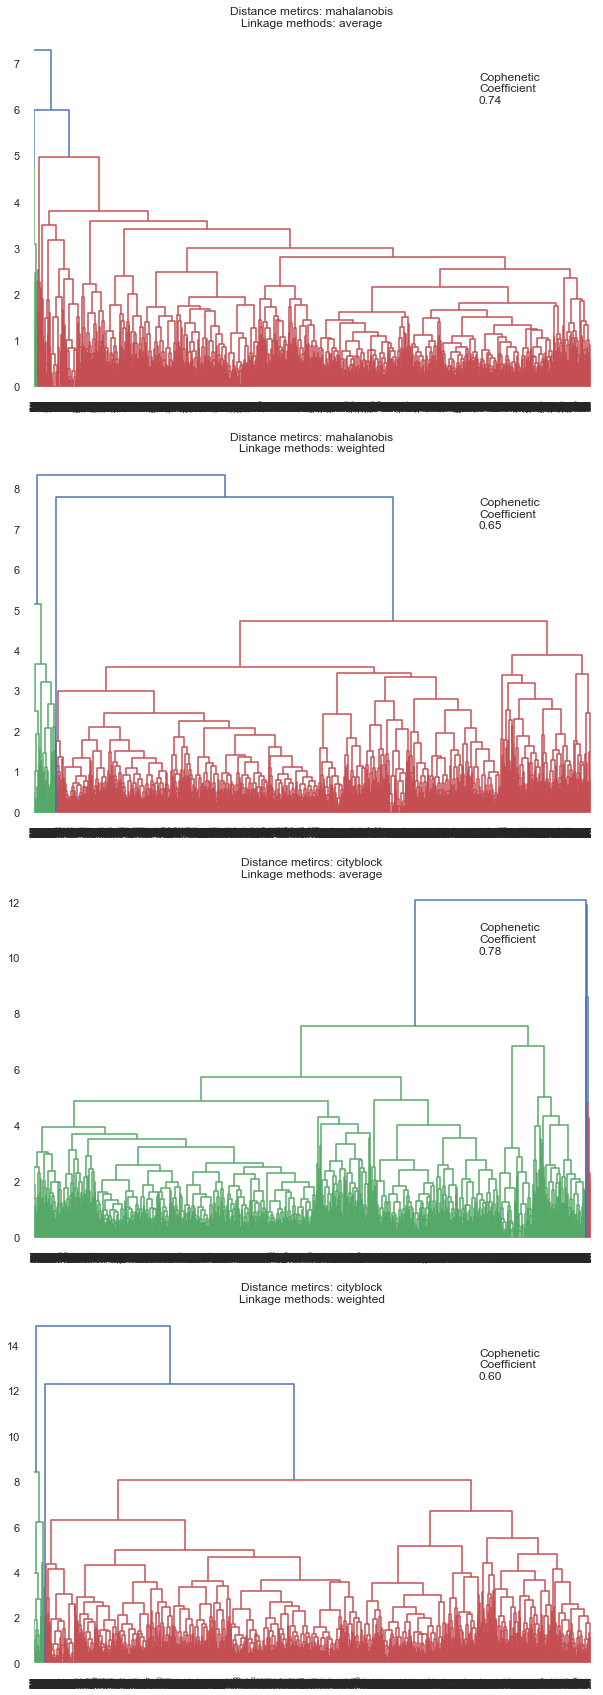

In [160]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

**Observations**
- Out of all the dendrogram we saw, it is clear that dendrogram with ward linkage method gave us separate and distinct clusters
- 3 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

## Let us create 3 clusters

In [161]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [162]:
df['HC_Clusters'] = HCmodel.labels_

In [163]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [164]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Sale_Price'].count().values

In [165]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
HC_Clusters,,,,,,
0,7713.67,7207.12,0.891192,3.0113,30.1264,965
1,6188.56,3358.6,45.5037,3.3476,48.586,1628
2,15138.7,11523.8,23.0287,3.57957,42.7043,558


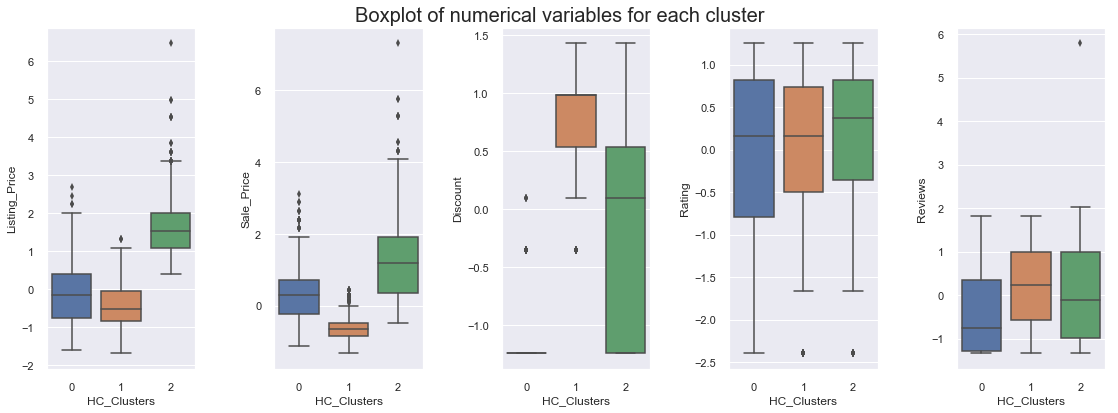

In [166]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

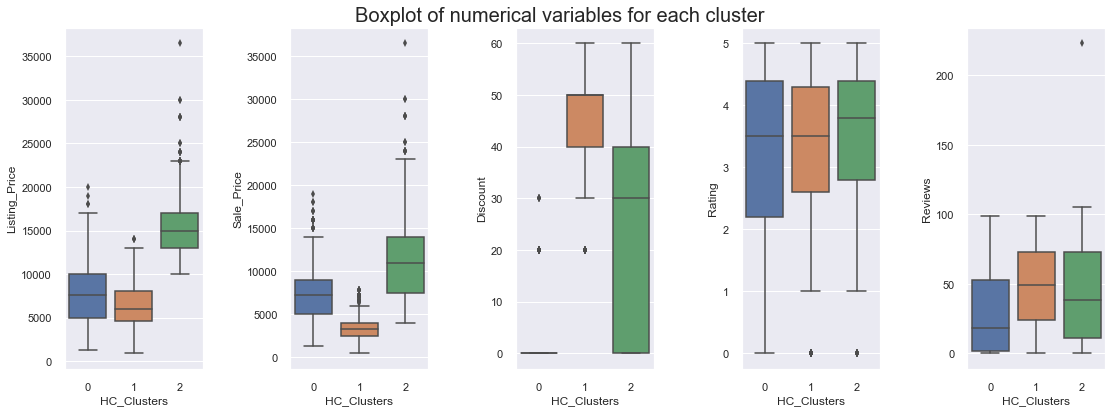

In [167]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This cluster contains products which are medium priced, with an median listing price of approximately 7500.
    - Almost no discount is given to products in these cluster.
    - The median rating of this cluster is around 3.5 suggesting that, customers are satisfied with 50% of the products in this clusters.
    - Products in this clusters have got lesser reviews, which can be due to the fact that these products are very expensive and fewer people buy them.
   
- **Cluster 1**:
    - Listing price is low for products in this cluster, and sale price is lower, as there are heavier discounts on these products.
    - Almost all the products have discount between 30% to 40%.
    - 50% of products have rating from 3.5 to 5 which indicates that customers satisfaction varies across products in this cluster.
    - On an average, 50 reviews is given to products in this cluster.
    
- **Cluster 2**:
    - This cluster contains premium products which are more expensive, with an median listing price of approximately 15000 and median sale price 11000.
    - The discount for products in this cluster varies from 0 % to 60%
    - Rating is very high



**Lets compare Cluster vs Brand**

In [168]:
pd.crosstab(df['HC_Clusters'], df.Brand).style.highlight_max(color = 'lightgreen', axis = 0)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
HC_Clusters,,,,,
0,0,249,214,115,387
1,0,861,469,298,0
2,1,1,223,193,140


**Observations**
- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

### Business Recommendations

- Cluster 2 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.
- Cluster 2 products can also be made available in showrooms situated in premium locations, because people generally tend to buy the premium products from showrooms.
- Cluster 1 consists of products which are sold at higher discounts, so these might be the ones which are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.
- Cluster 0 consists of products with comparatively low and medium price with almost no discount, so general marketing campaigns can be done for these to target the general public.